<a href="https://colab.research.google.com/github/deepthimalugu/project-ds/blob/main/pro2%20(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating and Forecasting Students' Academic Achievement through Machine Learning
**Student Name:** Malugu Sai Deepthi  
- **Student ID:** 23070109  
- **Email:** malugusaideepthi@gmail.com  
- **Course:** 2-Year Advanced Research (MSc Data Science)  
- **Module:** 7PAM2002 – Data Science Project  
- **Semester:** A 2025/2026  
- **Supervisor:** Vanadana Das

**Project Aim**

To apply machine learning algorithms to predict students’ academic outcomes and identify key personal, social, and academic factors influencing their success.

**Research Question**

Which personal, social, and school-related factors are most often determinants of students' academic performance, and can data science methods be used to accurately predict their final grades?

 **Dataset Information**
- **Source:** UCI Machine Learning Repository – *Student Performance Dataset*  
- **URL:** [https://archive.ics.uci.edu/ml/datasets/student+performance](https://archive.ics.uci.edu/ml/datasets/student+performance)  

In [ ]:



# --- Data Handling ---
import pandas as pd           # For data manipulation and analysis
import numpy as np            # For numerical operations

# --- Data Visualization ---
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns            # For advanced statistical plots

# --- Machine Learning ---
from sklearn.model_selection import train_test_split     # For splitting data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding/scaling
from sklearn.linear_model import LinearRegression         # Linear regression model
from sklearn.ensemble import RandomForestRegressor        # Random forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation metrics

# --- System / Utility ---
import warnings
warnings.filterwarnings('ignore')    # To ignore unnecessary warnings

# --- Display Settings ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
!pip install wordcloud





In [ ]:


# Load both datasets
math = pd.read_csv('student-mat.csv', sep=';')
port = pd.read_csv('student-por.csv', sep=';')

print("Math dataset shape:", math.shape)
print("Portuguese dataset shape:", port.shape)

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

common_cols = list(set(math.columns) & set(port.columns))
print("Common columns:", len(common_cols))


Common columns: 33


In [ ]:
# merging the datasets

merge_cols = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]


merged = pd.merge(math, port, on=merge_cols, suffixes=('_math', '_port'))

print("Merged dataset shape:", merged.shape)
merged.head()




Merged dataset shape: (382, 53)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_math,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery,higher_math,internet,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,guardian_port,traveltime_port,studytime_port,failures_port,schoolsup_port,famsup_port,paid_port,activities_port,higher_port,romantic_port,famrel_port,freetime_port,goout_port,Dalc_port,Walc_port,health_port,absences_port,G1_port,G2_port,G3_port
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13


In [ ]:

print("Shape:", merged.shape)
print("\nColumns:\n", merged.columns.tolist())

# Check for missing values
print("\nMissing values per column:\n", merged.isnull().sum())
print("\nTotal missing values:", merged.isnull().sum().sum())

# chech the  duplicates
print("Duplicates before:", merged.duplicated().sum())
merged = merged.drop_duplicates()
print("Duplicates after:", merged.duplicated().sum())


Shape: (382, 53)

Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet', 'romantic_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'guardian_port', 'traveltime_port', 'studytime_port', 'failures_port', 'schoolsup_port', 'famsup_port', 'paid_port', 'activities_port', 'higher_port', 'romantic_port', 'famrel_port', 'freetime_port', 'goout_port', 'Dalc_port', 'Walc_port', 'health_port', 'absences_port', 'G1_port', 'G2_port', 'G3_port']

Missing values per column:
 school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0


In [ ]:
import pandas as pd
from collections import Counter
import re

# Load dataset (merged one)
# merged = pd.read_csv("cleaned_merged_student_data.csv")

# Combine all text/categorical columns into one large string
text_cols = merged.select_dtypes(include=['object']).columns

# Join all text together
all_text = ""
for col in text_cols:
    all_text += " ".join(merged[col].astype(str).tolist()) + " "

# Clean the text: remove punctuation and make lowercase
clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text).lower()

# Split into words
words = clean_text.split()

# Count word frequencies
word_freq = Counter(words)

# Get top 20 most common words
most_common = word_freq.most_common(20)

# Display nicely
print("Top 20 Most Common Words in Dataset:")
for word, count in most_common:
    print(f"{word}: {count}")



Top 20 Most Common Words in Dataset:
yes: 2788
no: 2560
mother: 550
other: 415
t: 344
gp: 342
u: 301
gt: 278
services: 203
f: 198
m: 184
father: 182
course: 140
home: 110
le: 104
reputation: 98
teacher: 93
r: 81
athome: 69
health: 50


In [ ]:
grade_cols = ['G1_math','G2_math','G3_math','G1_port','G2_port','G3_port']
for col in grade_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')


In [ ]:
# Summary of numeric columns
merged.describe()

# Quick check of grade ranges
for col in grade_cols:
    print(f"{col}: min={merged[col].min()}, max={merged[col].max()}, mean={merged[col].mean():.2f}")


G1_math: min=3, max=19, mean=10.86
G2_math: min=0, max=19, mean=10.71
G3_math: min=0, max=20, mean=10.39
G1_port: min=0, max=19, mean=12.11
G2_port: min=5, max=19, mean=12.24
G3_port: min=0, max=19, mean=12.52


In [ ]:
num_cols = merged.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns:", list(num_cols))

for col in num_cols:
    print(f"{col}: min={merged[col].min()}, max={merged[col].max()}")



Numeric Columns: ['age', 'Medu', 'Fedu', 'traveltime_math', 'studytime_math', 'failures_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'traveltime_port', 'studytime_port', 'failures_port', 'famrel_port', 'freetime_port', 'goout_port', 'Dalc_port', 'Walc_port', 'health_port', 'absences_port', 'G1_port', 'G2_port', 'G3_port']
age: min=15, max=22
Medu: min=0, max=4
Fedu: min=0, max=4
traveltime_math: min=1, max=4
studytime_math: min=1, max=4
failures_math: min=0, max=3
famrel_math: min=1, max=5
freetime_math: min=1, max=5
goout_math: min=1, max=5
Dalc_math: min=1, max=5
Walc_math: min=1, max=5
health_math: min=1, max=5
absences_math: min=0, max=75
G1_math: min=3, max=19
G2_math: min=0, max=19
G3_math: min=0, max=20
traveltime_port: min=1, max=4
studytime_port: min=1, max=4
failures_port: min=0, max=3
famrel_port: min=1, max=5
freetime_port: min=1, max=5
goout_port: min=1, max=5
Dalc_port: min

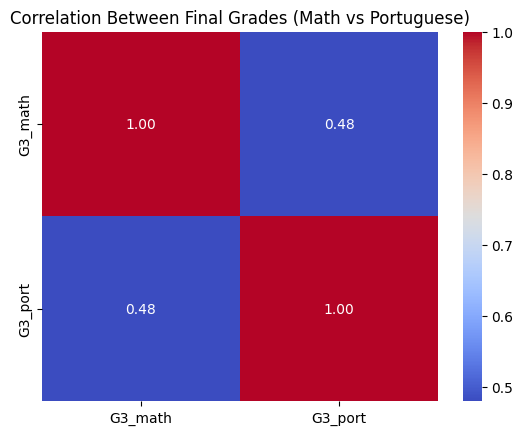

          G3_math   G3_port
G3_math  1.000000  0.480349
G3_port  0.480349  1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged[['G3_math','G3_port']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Final Grades (Math vs Portuguese)")
plt.show()

print(corr)


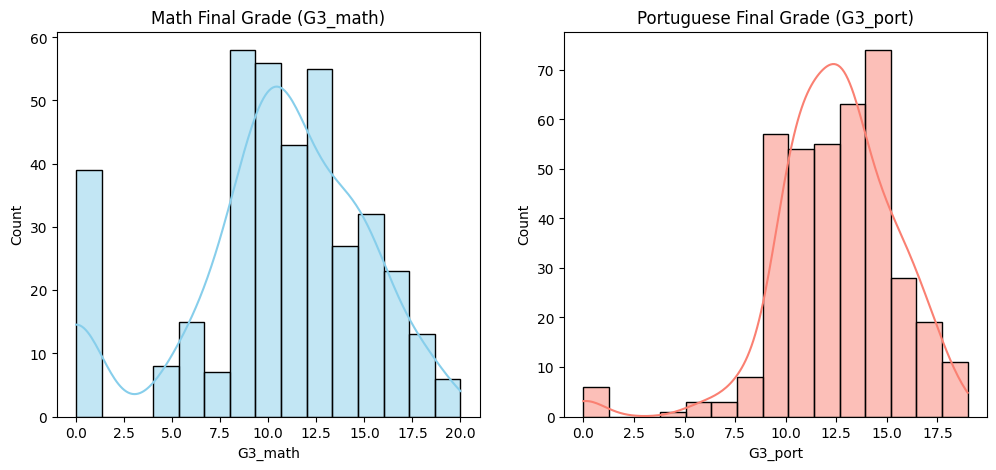

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(merged['G3_math'], bins=15, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Math Final Grade (G3_math)')

sns.histplot(merged['G3_port'], bins=15, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Portuguese Final Grade (G3_port)')

plt.show()



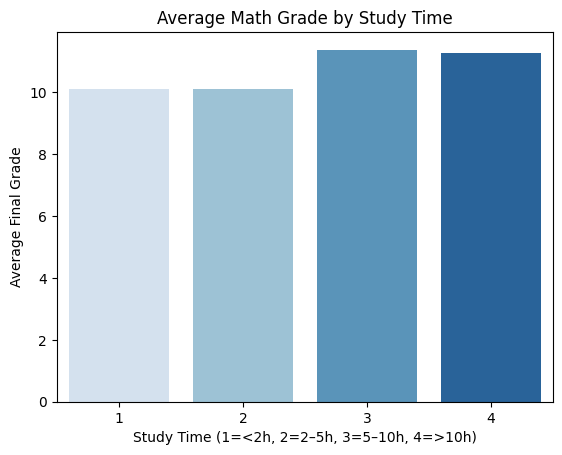

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x='studytime_math',
    y='G3_math',
    data=merged,
    ci=None,
    palette='Blues'
)

plt.title('Average Math Grade by Study Time')
plt.xlabel('Study Time (1=<2h, 2=2–5h, 3=5–10h, 4=>10h)')
plt.ylabel('Average Final Grade')
plt.show()




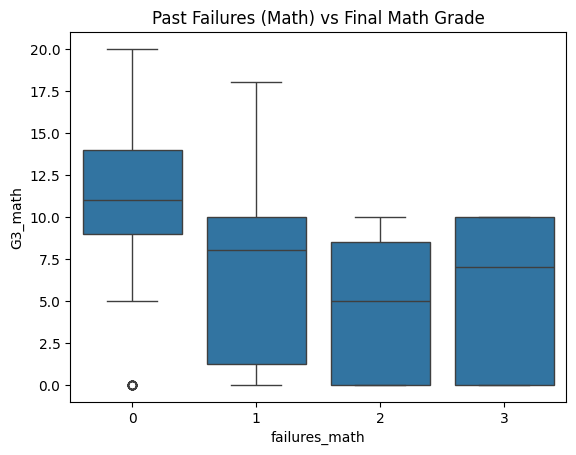

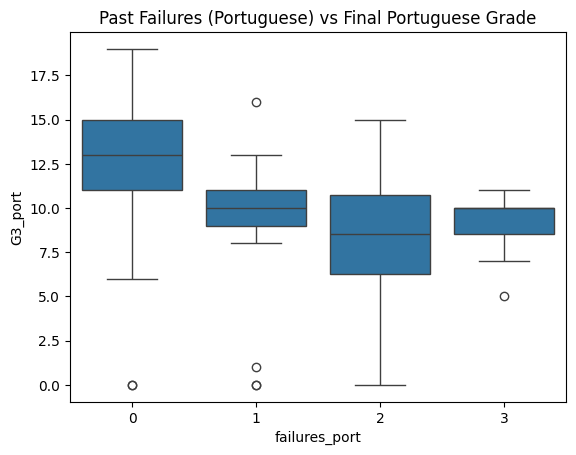

In [ ]:
sns.boxplot(x='failures_math', y='G3_math', data=merged)
plt.title('Past Failures (Math) vs Final Math Grade')
plt.show()

sns.boxplot(x='failures_port', y='G3_port', data=merged)
plt.title('Past Failures (Portuguese) vs Final Portuguese Grade')
plt.show()


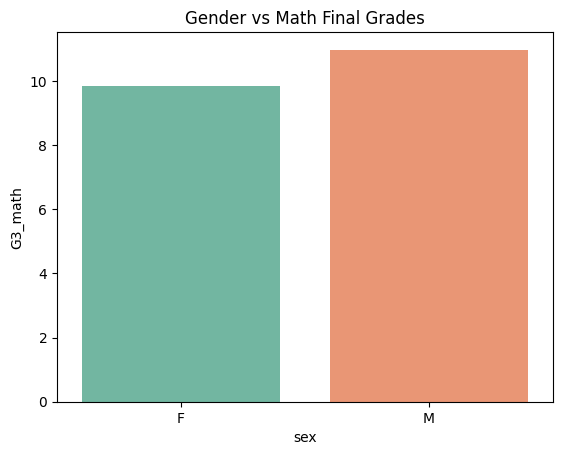

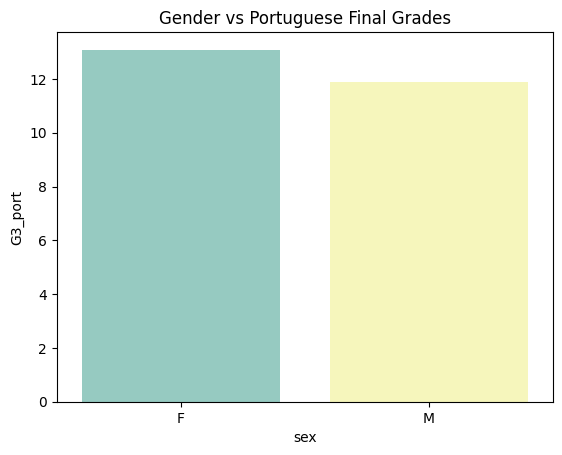

In [ ]:
sns.barplot(
    x='sex',
    y='G3_math',
    data=merged,
    palette='Set2',
    ci=None
)
plt.title('Gender vs Math Final Grades')
plt.show()

# Portuguese Grades by Gender
sns.barplot(
    x='sex',
    y='G3_port',
    data=merged,
    palette='Set3',
    ci=None
)
plt.title('Gender vs Portuguese Final Grades')
plt.show()


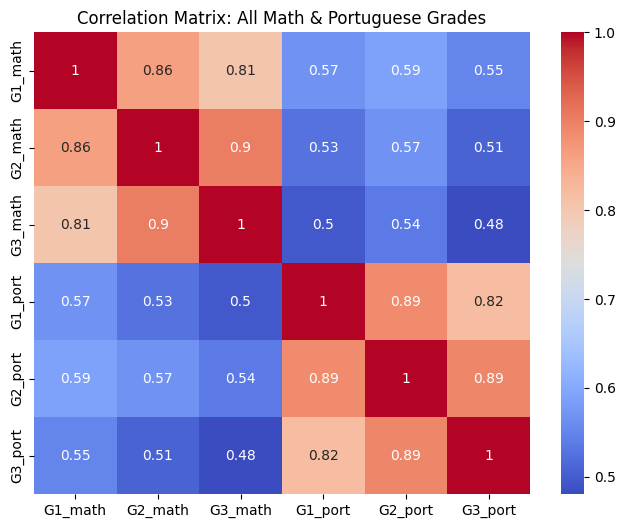

In [ ]:
grade_corr = merged[grade_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(grade_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: All Math & Portuguese Grades')
plt.show()


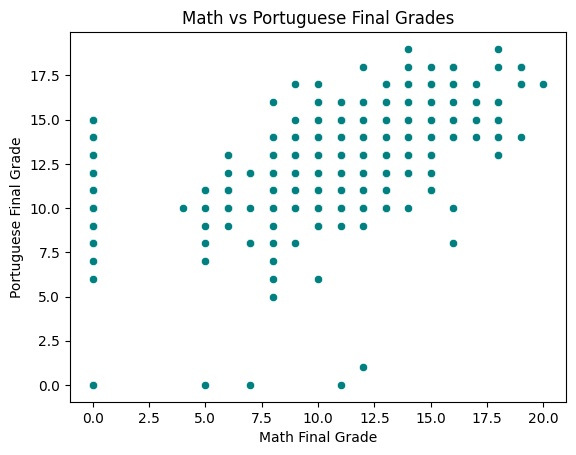

In [ ]:
sns.scatterplot(x='G3_math', y='G3_port', data=merged, color='teal')
plt.title('Math vs Portuguese Final Grades')
plt.xlabel('Math Final Grade')
plt.ylabel('Portuguese Final Grade')
plt.show()


In [ ]:



data = merged.copy()

# Encode categorical features
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Define feature and target for Math
X_math = data.drop(columns=['G3_math', 'G3_port'])
y_math = data['G3_math']

# Define feature and target for Portuguese
X_port = data.drop(columns=['G3_math', 'G3_port'])
y_port = data['G3_port']


In [ ]:
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(
    X_math, y_math, test_size=0.2, random_state=42
)

X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(
    X_port, y_port, test_size=0.2, random_state=42
)


In [ ]:
# Random Forest for Math
rf_math = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_math.fit(X_train_math, y_train_math)
y_pred_math = rf_math.predict(X_test_math)

# Random Forest for Portuguese
rf_port = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_port.fit(X_train_port, y_train_port)
y_pred_port = rf_port.predict(X_test_port)


In [ ]:
def evaluate_model(y_true, y_pred, subject):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n {subject} Model Performance")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

evaluate_model(y_test_math, y_pred_math, "Math")
evaluate_model(y_test_port, y_pred_port, "Portuguese")



 Math Model Performance
MAE  : 0.94
RMSE : 1.46
R²   : 0.90

 Portuguese Model Performance
MAE  : 0.78
RMSE : 1.20
R²   : 0.85


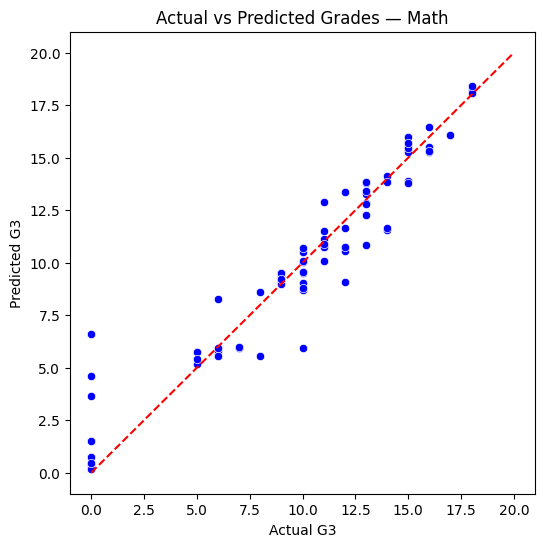

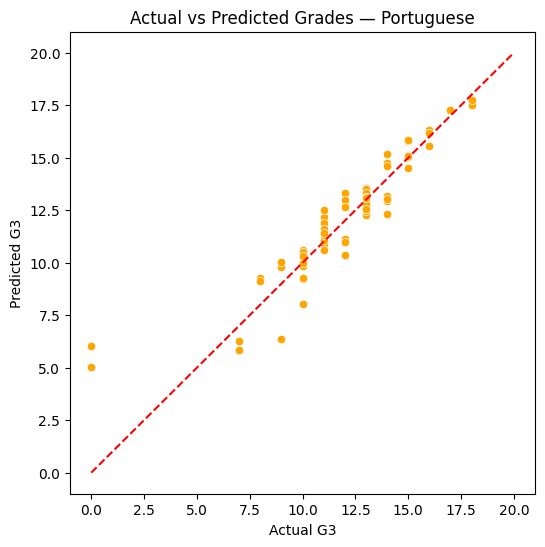

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_math, y=y_pred_math, color='blue')
plt.plot([0,20],[0,20],'--',color='red')
plt.title('Actual vs Predicted Grades — Math')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_port, y=y_pred_port, color='orange')
plt.plot([0,20],[0,20],'--',color='red')
plt.title('Actual vs Predicted Grades — Portuguese')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.show()


In [ ]:
def evaluate(y_true, y_pred, subject, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {subject} - {model_name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

In [ ]:
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

scaler_p = StandardScaler()
X_train_p_scaled = scaler_p.fit_transform(X_train_p)
X_test_p_scaled = scaler_p.transform(X_test_p)

In [ ]:
svm_math = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_math.fit(X_train_m_scaled, y_train_m)

svm_port = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_port.fit(X_train_p_scaled, y_train_p)

SVR(C=100, gamma=0.1)

In [ ]:
y_pred_math_svm = svm_math.predict(X_test_m_scaled)
y_pred_port_svm = svm_port.predict(X_test_p_scaled)

# --- Evaluate results ---
evaluate(y_test_m, y_pred_math_svm, "Math", "SVM Regression")
evaluate(y_test_p, y_pred_port_svm, "Portuguese", "SVM Regression")



📘 Math - SVM Regression Performance:
MAE  : 3.15
RMSE : 4.30
R²   : 0.17

📘 Portuguese - SVM Regression Performance:
MAE  : 1.90
RMSE : 2.89
R²   : 0.11


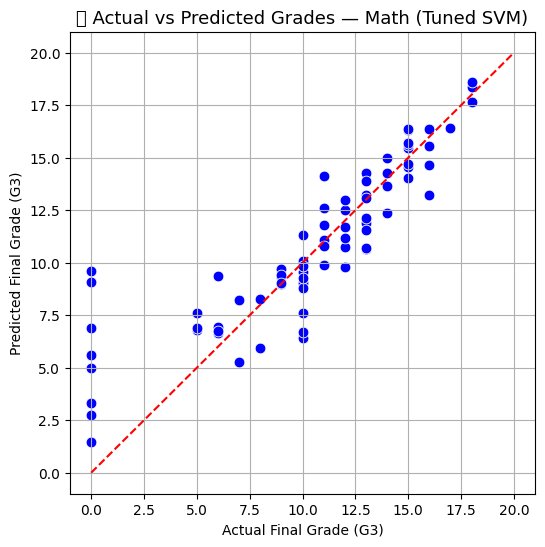

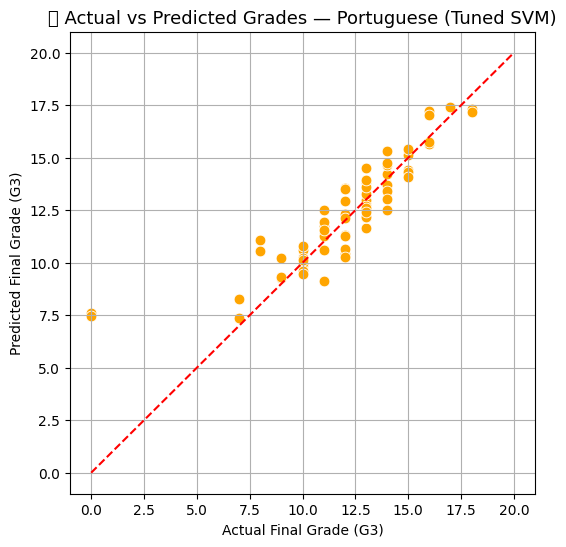

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scatter Plot for Math ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_m, y=y_pred_math_best, color='blue', s=60)
plt.plot([0, 20], [0, 20], '--', color='red')  # ideal line
plt.title('📘 Actual vs Predicted Grades — Math (Tuned SVM)', fontsize=13)
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.grid(True)
plt.show()

# --- Scatter Plot for Portuguese ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_p, y=y_pred_port_best, color='orange', s=60)
plt.plot([0, 20], [0, 20], '--', color='red')  # ideal line
plt.title('📘 Actual vs Predicted Grades — Portuguese (Tuned SVM)', fontsize=13)
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 50, 100, 200],
    'gamma': ['scale', 0.1, 0.01],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_math = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', verbose=1)
grid_math.fit(X_train_m_scaled, y_train_m)
print("Best Params for Math:", grid_math.best_params_)

grid_port = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', verbose=1)
grid_port.fit(X_train_p_scaled, y_train_p)
print("Best Params for Portuguese:", grid_port.best_params_)


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Params for Math: {'C': 10, 'epsilon': 0.1, 'gamma': 0.01}
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Params for Portuguese: {'C': 10, 'epsilon': 0.1, 'gamma': 0.01}


In [ ]:
# --- Retrain SVM models with best parameters ---
best_svm_math = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.1)
best_svm_math.fit(X_train_m_scaled, y_train_m)

best_svm_port = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.1)
best_svm_port.fit(X_train_p_scaled, y_train_p)

# --- Predict again using tuned models ---
y_pred_math_best = best_svm_math.predict(X_test_m_scaled)
y_pred_port_best = best_svm_port.predict(X_test_p_scaled)

# --- Evaluate ---
def evaluate(y_true, y_pred, subject, model_name):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {subject} - {model_name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

evaluate(y_test_m, y_pred_math_best, "Math", "Tuned SVM")
evaluate(y_test_p, y_pred_port_best, "Portuguese", "Tuned SVM")



 Math - Tuned SVM Performance:
MAE  : 1.51
RMSE : 2.36
R²   : 0.75

 Portuguese - Tuned SVM Performance:
MAE  : 0.92
RMSE : 1.53
R²   : 0.75


In [ ]:
lr_math = LinearRegression()
lr_math.fit(X_train_m, y_train_m)
y_pred_math_lr = lr_math.predict(X_test_m)

lr_port = LinearRegression()
lr_port.fit(X_train_p, y_train_p)
y_pred_port_lr = lr_port.predict(X_test_p)


In [ ]:
def evaluate(y_true, y_pred, subject, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{subject} - {model_name} Performance:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")

In [ ]:
evaluate(y_test_m, y_pred_math_lr, "Math", "Linear Regression")
evaluate(y_test_p, y_pred_port_lr, "Portuguese", "Linear Regression")


Math - Linear Regression Performance:
MAE  : 1.45
RMSE : 2.29
R²   : 0.77

Portuguese - Linear Regression Performance:
MAE  : 0.87
RMSE : 1.38
R²   : 0.80


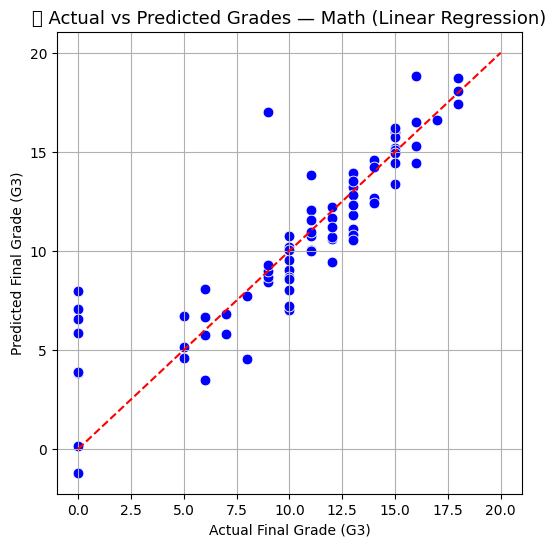

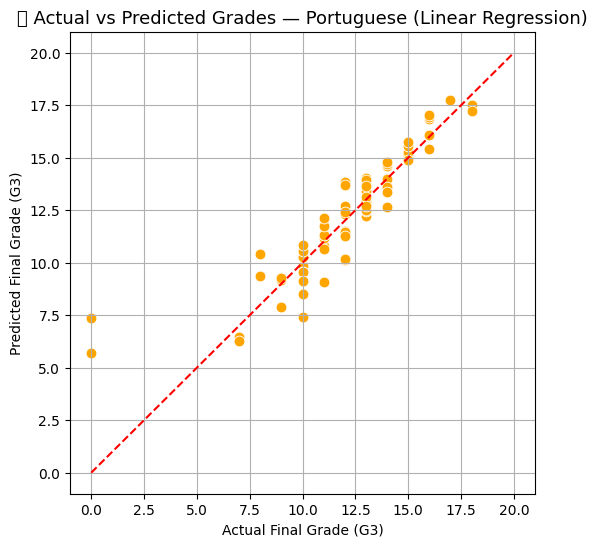

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Math ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_m, y=y_pred_math_lr, color='blue', s=60)
plt.plot([0, 20], [0, 20], '--', color='red')  # Ideal prediction line
plt.title('📘 Actual vs Predicted Grades — Math (Linear Regression)', fontsize=13)
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.grid(True)
plt.show()

# --- Portuguese ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_p, y=y_pred_port_lr, color='orange', s=60)
plt.plot([0, 20], [0, 20], '--', color='red')
plt.title('📘 Actual vs Predicted Grades — Portuguese (Linear Regression)', fontsize=13)
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.grid(True)
plt.show()
